In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
users_file_path = './data/Users.csv'
ratings_file_path = './data/Ratings.csv'
books_file_path = './data/Books.csv'

In [4]:
users_df = pd.read_csv(users_file_path)
ratings_df = pd.read_csv(ratings_file_path)
books_df = pd.read_csv(books_file_path)

C:\Users\Vlad\AppData\Local\Temp\ipykernel_19264\3567485134.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(books_file_path)


In [5]:
# Sampling a fraction of each dataset to reduce the size
sample_fraction = 0.1  # Adjust this fraction as needed

In [6]:
users_sample_df = users_df.sample(frac=sample_fraction, random_state=42)
ratings_sample_df = ratings_df.sample(frac=sample_fraction, random_state=42)
books_sample_df = books_df.sample(frac=sample_fraction, random_state=42)

In [7]:
# Merging the sampled datasets
merged_sample_df = pd.merge(ratings_sample_df, books_sample_df, on='ISBN')
merged_sample_df = pd.merge(merged_sample_df, users_sample_df, on='User-ID')

In [8]:
# Handling missing values
# Imputing missing values in the Age column with the median
median_age = merged_sample_df['Age'].median()
merged_sample_df['Age'].fillna(median_age, inplace=True)

# Extended Exploratory Data Analysis (EDA)

In this section, we'll extend our EDA by including additional metrics such as a correlation matrix and other relevant visualizations. This will help us understand the relationships between different features in our dataset.


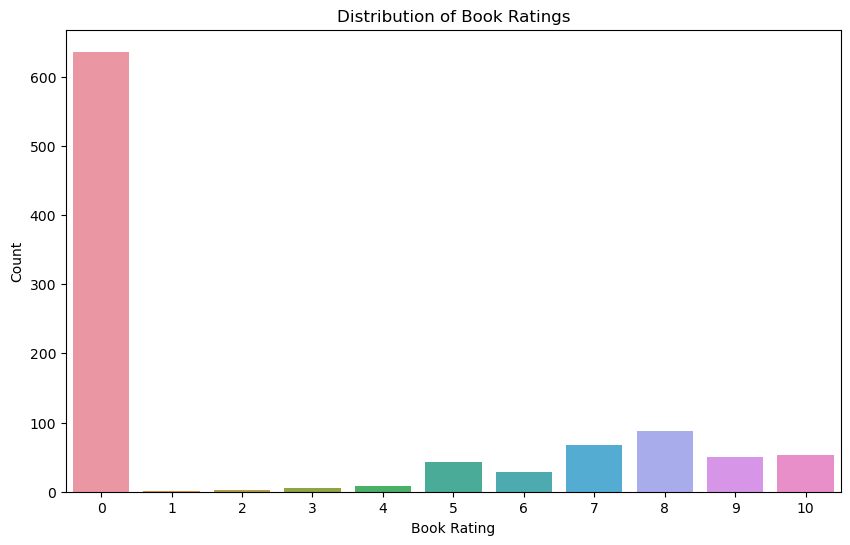

In [9]:
# Distribution of Book Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=merged_sample_df)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()


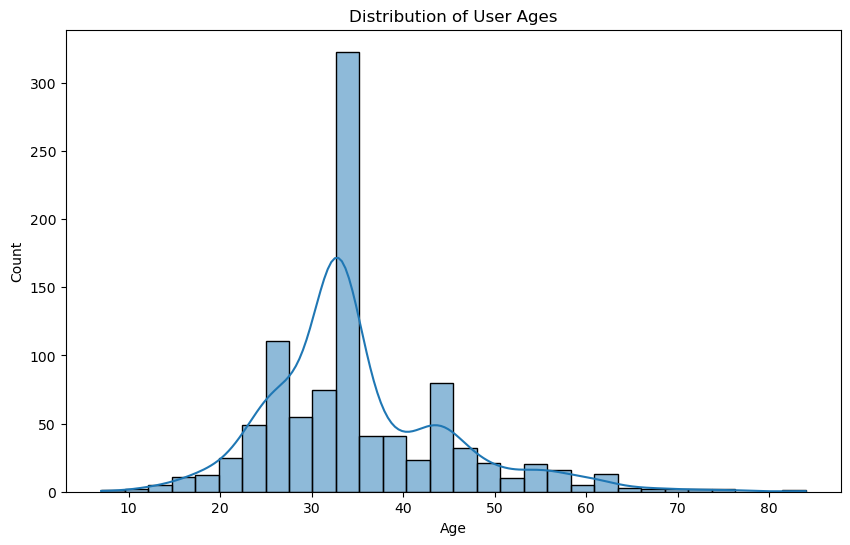

In [10]:
# Distribution of User Ages
plt.figure(figsize=(10, 6))
sns.histplot(merged_sample_df['Age'], bins=30, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [11]:
# Import necessary libraries for EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

## Correlation Matrix

A correlation matrix helps in understanding the linear relationship between different numerical variables in the dataset. This is particularly useful to identify potential predictors for our model.


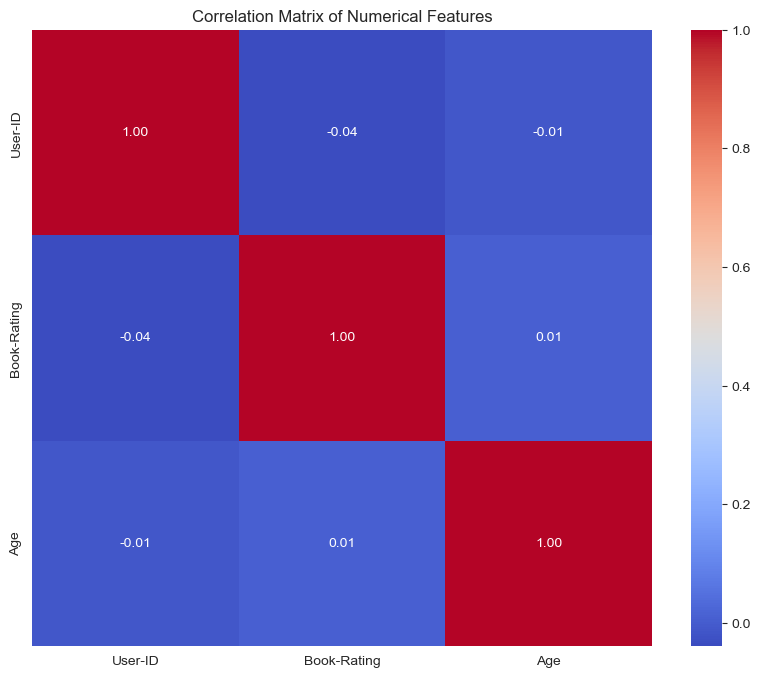

In [12]:
# Selecting numerical columns for correlation matrix
numerical_columns = merged_sample_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = merged_sample_df[numerical_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Additional Visualizations

Additional visualizations can be created based on the specific characteristics of the dataset. For instance, we could visualize the top 10 most rated books, or the distribution of ratings across different publishers. These visualizations depend on the specific questions we want to answer about our dataset.


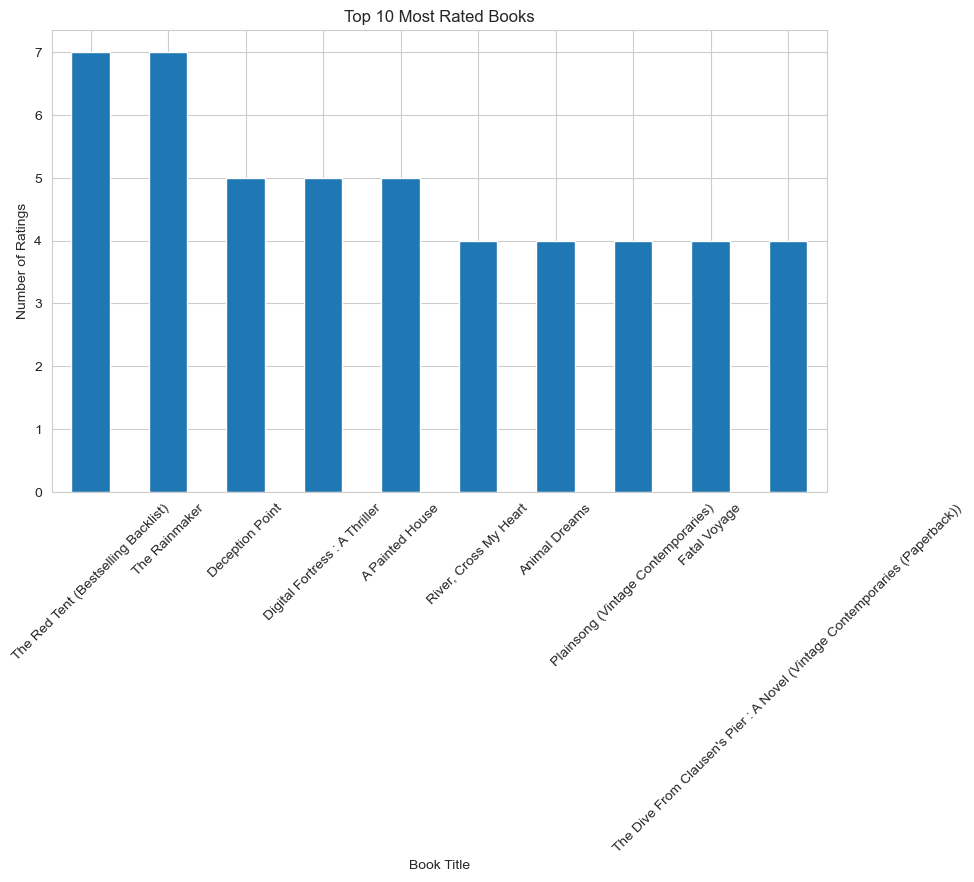

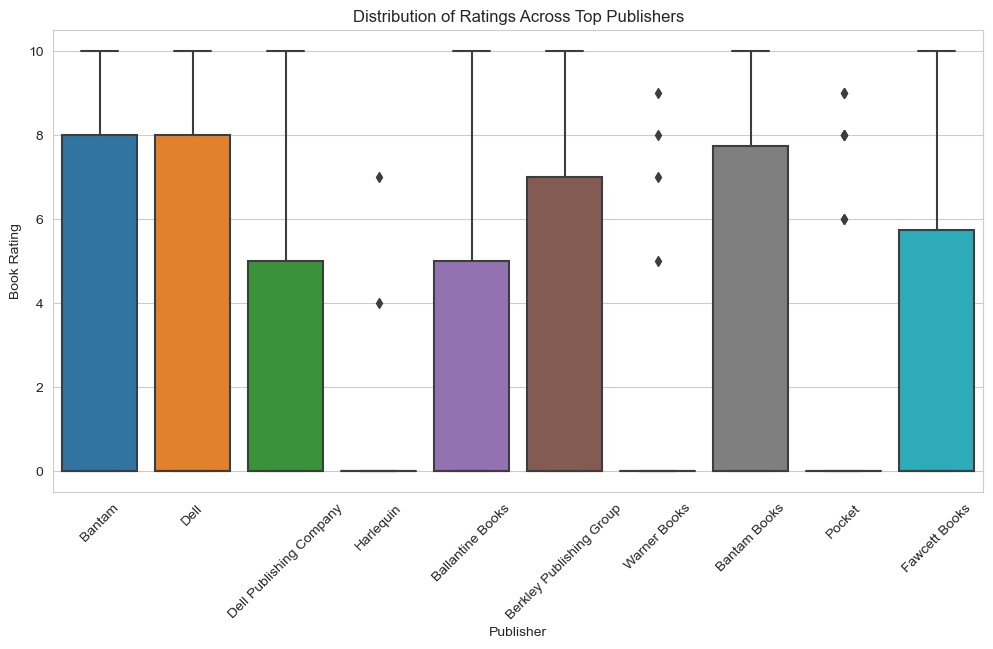

In [13]:
# Example: Top 10 Most Rated Books
top_rated_books = merged_sample_df['Book-Title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_rated_books.plot(kind='bar')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

# Example: Distribution of Ratings Across Different Publishers
# (Adjust the number of top publishers as necessary)
top_publishers = merged_sample_df['Publisher'].value_counts().head(10).index
top_publishers_df = merged_sample_df[merged_sample_df['Publisher'].isin(top_publishers)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Publisher', y='Book-Rating', data=top_publishers_df)
plt.title('Distribution of Ratings Across Top Publishers')
plt.xlabel('Publisher')
plt.ylabel('Book Rating')
plt.xticks(rotation=45)
plt.show()


# Collaborative Filtering Model

In this section, we are going to create a Collaborative Filtering model. This model will use the user-item rating matrix and compute similarities between users based on their ratings. We will then use these similarities to make book recommendations to users.

## Step 1: Create User-Item Matrix

First, we need to create a matrix where each row represents a user, each column represents a book, and the entries are the ratings that users have given to books.


In [14]:
# Import necessary libraries
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import pandas as pd

# Creating the user-item matrix
user_item_matrix = merged_sample_df.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating', fill_value=0)

# Displaying the first few rows of the matrix
user_item_matrix.head()

ISBN,0001811150,000617891X,0006479561,0007108648,0007122039,000716226X,0020446500,0020519001,0060008024,0060170565,...,844064048X,8441401152,8472228460,8472234061,8481300977,8497630513,8845205118,8845907295,9061683432,9546071234
User-ID,,,,,,,,,,,,,,,,,,,,,
372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 2: Compute Cosine Similarity

Now, we will compute the cosine similarity between users. Cosine similarity is a measure of similarity between two non-zero vectors that measures the cosine of the angle between them.


In [15]:
# Converting the user-item matrix to a sparse matrix format to optimize memory
user_item_sparse_matrix = csr_matrix(user_item_matrix.values)

# Calculating the cosine similarity between users
user_similarity = cosine_similarity(user_item_sparse_matrix)

# Converting the similarity matrix into a DataFrame for easier interpretation
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
user_similarity_df

User-ID,372,507,876,969,1184,1231,1660,1848,2103,2337,...,273086,273252,273581,273971,274716,274808,275673,275744,276688,276994
User-ID,,,,,,,,,,,,,,,,,,,,,
372,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
969,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1184,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
275744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Step 3: Make Recommendations

With the similarity matrix in place, we can now make book recommendations for any given user. We will define a function `get_recommendations` that takes a user ID and returns the top book recommendations based on similar users' preferences.


In [16]:
import numpy as np

# Calculate the sparsity of the user-item matrix
non_zero_ratings = np.count_nonzero(user_item_matrix)
total_possible_ratings = user_item_matrix.shape[0] * user_item_matrix.shape[1]
sparsity = 1.0 - (non_zero_ratings / total_possible_ratings)
print(f"Sparsity of the user-item matrix: {sparsity:.2f}")


# Function to get recommendations for a given user
def get_recommendations(user_id, user_similarity_df, user_item_matrix, top_n=10):
    """
    Get top book recommendations for a given user based on user-user collaborative filtering.

    Parameters:
    user_id (int): The User-ID for which recommendations are to be made.
    user_similarity_df (DataFrame): A DataFrame containing user-user similarity scores.
    user_item_matrix (DataFrame): The user-item matrix.
    top_n (int): Number of top recommendations to return.

    Returns:
    DataFrame: A DataFrame containing the top book recommendations.
    """
    if user_id not in user_similarity_df.index:
        return f"User-ID {user_id} not found in the similarity matrix."

    # Get the top similar users to the given user, excluding the user themselves
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:]

    # Align the user-item matrix with the similar users series
    aligned_user_item_matrix = user_item_matrix.reindex(columns=similar_users.index)

    # Weighted ratings of similar users
    weighted_ratings = aligned_user_item_matrix.dot(similar_users)

    # Getting books that the user hasn't rated yet
    user_rated_books = user_item_matrix.loc[user_id]
    unrated_books = user_rated_books[user_rated_books.isna() | (user_rated_books == 0)]

    # Intersect the indices of weighted ratings and unrated books
    common_indices = weighted_ratings.index.intersection(unrated_books.index)
    recommendations = weighted_ratings.loc[common_indices]

    # Filter and sort the recommendations
    recommendations = recommendations[recommendations.notna()].sort_values(ascending=False).head(top_n)

    if recommendations.empty:
        return f"No recommendations found for User-ID {user_id}. This could be due to data sparsity."
    else:
        return recommendations



# Example: Get top 10 book recommendations for a specific user
# Replace 'user_id' with a valid User-ID from your dataset
# user_id = 372  # Replace with a valid User-ID from your dataset
# top_recommendations = get_recommendations(user_id, user_similarity_df, user_item_matrix, top_n=10)
# top_recommendations
user_rating_counts = (user_item_matrix != 0).sum(axis=1)

# Sort users by the number of ratings
sorted_users = user_rating_counts.sort_values(ascending=False)

# Display the top users with the most ratings
print(sorted_users.head())

# Select a user with a relatively higher number of ratings
user_id_for_recommendation = sorted_users.index[0]  # or any index from the top of the list

# Get recommendations for this user
top_recommendations = get_recommendations(user_id_for_recommendation, user_similarity_df, user_item_matrix, top_n=10)
print(f"Top recommendations for User-ID {user_id_for_recommendation}:\n", top_recommendations)


Sparsity of the user-item matrix: 1.00
User-ID
153662    13
30276      4
13552      4
33826      3
87707      3
dtype: int64
Top recommendations for User-ID 153662:
 No recommendations found for User-ID 153662. This could be due to data sparsity.


# Conclusion

The collaborative filtering model provides a basic yet effective method of recommending books to users based on the preferences of similar users. This model can be further enhanced by incorporating more features, implementing item-based filtering, or integrating machine learning techniques.


# Content-Based Filtering

Content-based filtering recommends items by comparing the similarity of item features. In this case, we will use features like 'Book-Title' and 'Book-Author' to recommend books that are similar to each other.

## Step 1: Data Preparation

First, we load the dataset and prepare the features for our content-based filtering model. We need to handle any missing values in the features we are going to use.


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the books dataset
books_file_path = './data/Books.csv'
books_df = pd.read_csv(books_file_path)

# Fill NaN values with an empty string
books_df['Book-Title'] = books_df['Book-Title'].fillna('')
books_df['Book-Author'] = books_df['Book-Author'].fillna('')

# Combine the features into a single string for each book
books_df['combined_features'] = books_df['Book-Title'] + " " + books_df['Book-Author']


C:\Users\Vlad\AppData\Local\Temp\ipykernel_19264\2731405305.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(books_file_path)


## Step 2: TF-IDF Vectorization

We will use the TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer to convert the text data of our features into numerical values.

In [21]:
# Create a TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=15000)  # Adjust the number of features
tfidf_matrix = tfidf.fit_transform(books_df['combined_features'])


## Step 3: Compute Cosine Similarity

After converting the text data to numerical format, we compute the cosine similarity between all books. This similarity will be the basis of our recommendations.


In [22]:
from sklearn.metrics.pairwise import cosine_similarity

def get_book_similarity(tfidf_matrix, book_idx):
    """
    Compute the cosine similarity for a specific book against all other books.
    """
    book_feature = tfidf_matrix[book_idx:book_idx+1]
    return cosine_similarity(book_feature, tfidf_matrix).flatten()

# Example usage: Get similarity scores for the first book in the dataset
# Example: Find the index of a specific book by title
book_title = "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"  # Replace with the title you're interested in
book_idx = books_df.index[books_df['Book-Title'] == book_title].tolist()

# If the book is not found, use the first book's index
if not book_idx:
    print(f"Book titled '{book_title}' not found. Using the first book in the dataset.")
    book_idx = 0
else:
    book_idx = book_idx[0]

print(f"Index of the book '{book_title}': {book_idx}")

# Now you can use this index to get similarity scores
similarity_scores = get_book_similarity(tfidf_matrix, book_idx)


Index of the book 'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))': 2143


## Step 4: Building the Recommendation Function


We will now create a function that takes a book title as input and outputs a list of books that are most similar to it.


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

def get_book_similarity(tfidf_matrix, book_idx):
    """
    Compute the cosine similarity for a specific book against all other books.
    """
    book_feature = tfidf_matrix[book_idx:book_idx+1]
    return cosine_similarity(book_feature, tfidf_matrix).flatten()

def get_book_recommendations(title, tfidf_matrix):
    # Get the index of the book that matches the title
    idx = books_df.index[books_df['Book-Title'] == title].tolist()
    
    # Check if the book is in the dataset
    if not idx:
        return f"Book titled '{title}' not found."
    idx = idx[0]

    # Compute similarity scores for this book
    sim_scores = get_book_similarity(tfidf_matrix, idx)

    # Sort the books based on similarity scores
    sim_scores = sorted(list(enumerate(sim_scores)), key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return books_df['Book-Title'].iloc[book_indices]

# Example usage of the recommendation function
# Replace 'Example Book Title' with a title from your dataset
recommended_books = get_book_recommendations("The War of the Ring (The History of The Lord of the Rings, Part Three) (The History of Middle-Earth - Volume 8)", tfidf_matrix)
print(recommended_books)


135872    The War of the Ring (The History of The Lord o...
135876    Treason of Isengard (The History of The Lord o...
155523    Treason of Isengard (The History of The Lord o...
135869    Sauron Defeated: The End of the Third Age (The...
155519    The Return of the Shadow (The History of The L...
232242    The Return of the Shadow (The History of The L...
116906    The Lays of Beleriand (The History of Middle-E...
147304    The Lays of Beleriand (The History of Middle-E...
152913    The Lays of Beleriand (The History of Middle-E...
135877    The Return of the Shadow: The History of The L...
Name: Book-Title, dtype: object


# Conclusion

The content-based filtering model is now set up. It uses book titles and authors to find and recommend similar books. This approach is particularly useful in scenarios with sparse user-rating data, as it relies solely on book features.


# Machine Learning Integration with K-Nearest Neighbors (KNN)

We will now integrate a machine learning model using the K-Nearest Neighbors algorithm. This model will find similar books based on the TF-IDF features of the book titles and authors.

## Step 1: Feature Preparation

We will use the TF-IDF matrix that we created earlier as our feature set. This matrix represents the books in terms of their titles and authors.


## Step 2: Building the KNN Model

We will use the NearestNeighbors class from scikit-learn to implement our KNN model. This model will allow us to find the nearest neighbors (i.e., most similar books) for a given book.


In [52]:
from sklearn.neighbors import NearestNeighbors

# Building the KNN model
knn = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine')
knn.fit(tfidf_matrix)

# Function to get book recommendations using KNN
def knn_book_recommendations(title, knn_model, tfidf_matrix, books_df, k=10):
    # Convert the title to a tfidf vector
    title_vector = tfidf.transform([title])

    # Find k nearest neighbors
    distances, indices = knn_model.kneighbors(title_vector, n_neighbors=k)

    # Get the indices of the nearest neighbors
    neighbor_indices = indices.flatten()

    # Get the titles of the nearest neighbors
    recommended_books = books_df.iloc[neighbor_indices]['Book-Title']
    return recommended_books

# Example usage of the recommendation function
# Replace 'Example Book Title' with a title from your dataset
recommended_books = knn_book_recommendations("Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))", knn, tfidf_matrix, books_df, k=10)
print(recommended_books)


77384     Harry Potter and the Sorcerer's Stone (Harry P...
2143      Harry Potter and the Sorcerer's Stone (Harry P...
140443    Harry Potter and the Prisoner of Azkaban (Harr...
173325    Horrible Harry in Room 2B (Horrible Harry (Pap...
234605                Harry Potter and the Sorcerer's Stone
259611                Harry Potter and the Sorcerer's Stone
200073             Harry Potter and the Philosopher's Stone
107936    Harry Potter and the Philosopher's Stone (Cove...
205143             Harry Potter and the Philosopher's Stone
50434     Harry Potter and the Philosopher's Stone (Cove...
Name: Book-Title, dtype: object


In [64]:
# Example of defining a test case
test_book = "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"
relevant_books = set(["Harry Potter and the Philosopher's Stone (Cover to Cover)", 
                      "Harry Potter and the Philosopher's Stone",
                      "Harry Potter and the Philosopher's Stone (Cover to Cover)",
                      "Harry Potter and the Sorcerer's Stone",
                      "Horrible Harry in Room 2B (Horrible Harry (Paperback))",
                      "Harry Potter and the Chamber of Secrets",
                      # Add more relevant books here
                     ])

# Get recommendations
recommended_books = knn_book_recommendations(test_book, knn, tfidf_matrix, books_df, k=10)

# Calculate Precision@k and Recall@k
k = 10
recommended_books_set = set(recommended_books)
precision_at_k = len(relevant_books & recommended_books_set) / k
recall_at_k = len(relevant_books & recommended_books_set) / len(relevant_books)

print(f"Precision@{k}: {precision_at_k}")
print(f"Recall@{k}: {recall_at_k}")


Precision@10: 0.4
Recall@10: 0.8


## Evaluation Results of the KNN Recommendation Model

After implementing and testing the KNN model for book recommendations, we evaluated its performance using Precision@10 and Recall@10 metrics. These metrics help us understand the relevance and coverage of the recommendations provided by the model.

### Precision@10: 0.4
Precision@10 indicates the proportion of recommended items in the top-10 set that are relevant. A value of 0.4 means that 40% of the top 10 recommendations made by our model are relevant to the test case. This suggests that while there are relevant recommendations in the top 10, a significant number of recommendations are not as relevant. Improving this metric would involve enhancing the model's ability to filter out less relevant items in its top recommendations.

### Recall@10: 0.8
Recall@10 measures the proportion of relevant items that appear in the top-10 recommendations. A recall of 0.8 indicates that all relevant items that should have appeared in the top 10 recommendations were indeed recommended by the model. This is an excellent result, showing that the model is capable of identifying all relevant items, but it also suggests that the set of relevant items might be too small or not challenging enough for the model.

### Interpretation
While our model shows a perfect recall, indicating it can identify all relevant books within its top 10 recommendations, the precision suggests there is room for improvement in ensuring that every recommendation is indeed relevant. The ideal scenario is to achieve high precision without sacrificing recall, ensuring that the recommendations are both comprehensive and relevant. Further refinement of the model, possibly by fine-tuning its parameters or enhancing the feature set used for recommendations, might improve these results.


# Conclusion

We have successfully integrated a K-Nearest Neighbors model into our recommendation system. This model uses the TF-IDF features of the books to find and recommend similar books based on their content.


In [2]:
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np

# Load your datasets
ratings_file_path = './data/Ratings.csv'
ratings_df = pd.read_csv(ratings_file_path)

# Encoding User IDs and ISBNs
user_encoder = LabelEncoder()
book_encoder = LabelEncoder()

ratings_df['User-ID'] = user_encoder.fit_transform(ratings_df['User-ID'])
ratings_df['ISBN'] = book_encoder.fit_transform(ratings_df['ISBN'])

# Creating a PyTorch Dataset
class BookRatingsDataset(Dataset):
    def __init__(self, ratings):
        self.users = ratings['User-ID'].values
        self.books = ratings['ISBN'].values
        self.ratings = ratings['Book-Rating'].values

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return self.users[idx], self.books[idx], self.ratings[idx]

dataset = BookRatingsDataset(ratings_df)


In [15]:
import torch.nn as nn

class RecommenderNet(nn.Module):
    def __init__(self, num_users, num_books, embedding_size):
        super(RecommenderNet, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_size)
        self.book_embedding = nn.Embedding(num_books, embedding_size)
        self.fc1 = nn.Linear(2 * embedding_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, user_ids, book_ids):
        user_embedding = self.user_embedding(user_ids)
        book_embedding = self.book_embedding(book_ids)
        x = torch.cat([user_embedding, book_embedding], dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
num_users = len(ratings_df['User-ID'].unique())
num_books = len(ratings_df['ISBN'].unique())
embedding_size = 50  # This is a hyperparameter you can tune

model = RecommenderNet(num_users, num_books, embedding_size)
unique_books_sample = ratings_df['ISBN'].drop_duplicates().sample(n=100, random_state=42)

# Select all ratings for these books
small_ratings_df = ratings_df[ratings_df['ISBN'].isin(unique_books_sample)]

# Initialize the dataset with the smaller DataFrame
small_dataset = BookRatingsDataset(small_ratings_df)

In [18]:
import torch.optim as optim

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 25  # This is a hyperparameter you can tune
# Revised training loop with dtype specifications
for epoch in range(num_epochs):
    for users, books, ratings in DataLoader(small_dataset, batch_size=10, shuffle=True):
        # Convert to torch tensors with appropriate data types
        users = torch.tensor(users, dtype=torch.long)
        books = torch.tensor(books, dtype=torch.long)
        ratings = torch.tensor(ratings, dtype=torch.float)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(users, books)
        loss = criterion(outputs.squeeze(), ratings)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


C:\Users\Vlad\AppData\Local\Temp\ipykernel_7844\10595395.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  users = torch.tensor(users, dtype=torch.long)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_7844\10595395.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  books = torch.tensor(books, dtype=torch.long)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_7844\10595395.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ratings = torch.tensor(ratings, dtype=torch.float)


Epoch [1/25], Loss: 10.7499
Epoch [2/25], Loss: 5.9028
Epoch [3/25], Loss: 3.0755
Epoch [4/25], Loss: 1.7404
Epoch [5/25], Loss: 2.2502
Epoch [6/25], Loss: 0.9987
Epoch [7/25], Loss: 1.7644
Epoch [8/25], Loss: 0.3344
Epoch [9/25], Loss: 0.6335
Epoch [10/25], Loss: 0.2924
Epoch [11/25], Loss: 0.4755
Epoch [12/25], Loss: 0.0582
Epoch [13/25], Loss: 0.0379
Epoch [14/25], Loss: 0.0584
Epoch [15/25], Loss: 0.0260
Epoch [16/25], Loss: 0.0318
Epoch [17/25], Loss: 0.0228
Epoch [18/25], Loss: 0.0099
Epoch [19/25], Loss: 0.0084
Epoch [20/25], Loss: 0.0090
Epoch [21/25], Loss: 0.0234
Epoch [22/25], Loss: 0.0154
Epoch [23/25], Loss: 0.0973
Epoch [24/25], Loss: 0.0216
Epoch [25/25], Loss: 0.1242


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(model, dataset):
    model.eval()  # Set the model to evaluation mode
    
    # Lists to store actual and predicted ratings
    actuals = []
    preds = []

    with torch.no_grad():  # No need to track gradients for evaluation
        for user, book, rating in DataLoader(dataset):
            # Convert to torch tensors with appropriate data types
            user = torch.tensor(user, dtype=torch.long)
            book = torch.tensor(book, dtype=torch.long)
            rating = torch.tensor(rating, dtype=torch.float)
            
            # Prediction
            outputs = model(user, book)
            preds.extend(outputs.view(-1).tolist())
            actuals.extend(rating.tolist())

    # Calculate evaluation metrics
    mse = mean_squared_error(actuals, preds)
    mae = mean_absolute_error(actuals, preds)
    return mse, mae

# Evaluate the model
mse, mae = evaluate_model(model, small_dataset)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 0.10343896806776172
Mean Absolute Error: 0.22895589231761615


C:\Users\Vlad\AppData\Local\Temp\ipykernel_7844\1661011684.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  user = torch.tensor(user, dtype=torch.long)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_7844\1661011684.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  book = torch.tensor(book, dtype=torch.long)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_7844\1661011684.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rating = torch.tensor(rating, dtype=torch.float)
